## 4. 뉴스 카테고리 다중분류

### ****4-1. 들어가며****

****머신러닝을 이용한 텍스트 분류****

텍스트 분류(Text Classification) - 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크

텍스트 분류 종류 - '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류'

#### 텍스트 분류 과정

벡터화 방법 - 워드 임베딩

딥러닝 모델 - RNN, CNN, BERT

**텍스트 분류**

이진 분류(Binary Classification) - 클래스가 2개인 경우

다중 클래스 분류(Multiclass Classification) - 3개 이상인 경우 ****

**여러 머신러닝 알고리즘을 사용해서 텍스트를 분류**

### ****4-2. 로이터 뉴스 데이터 (1) 데이터 확인하기****

로이터 뉴스 데이터 - 텐서플로우 데이터셋에서 제공하고 있는 데이터로 총 46개의 클래스로 구성

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


#### 훈련 데이터와 테스트 데이터 로드하기

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

2121728/2110848 [==============================] - 0s 0us/step
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 출력해보기

In [3]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


`num_words`는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절

`num_words`의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아님

`test_split = 0.2`는 전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다는 의미

In [4]:
print(y_train[0])
print(y_test[0])

3
3


In [5]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


#### 데이터 분포 확인해보기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


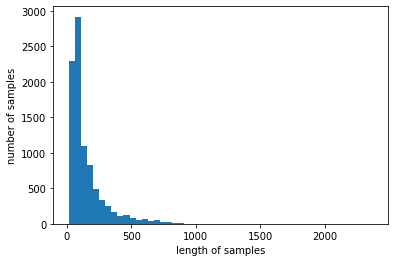

In [6]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

길이가 가장 긴 뉴스의 길이는 2,376입니다. 평균 길이는 145

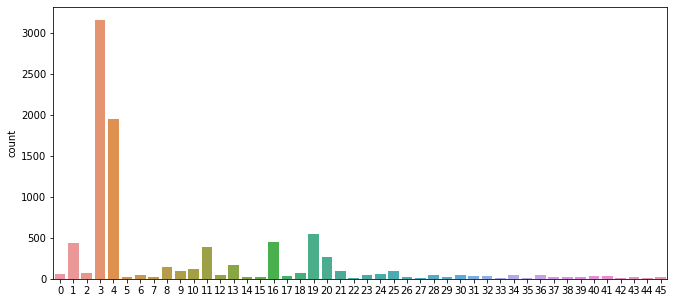

In [7]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [8]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재

### ****4-3. 로이터 뉴스 데이터 (2) 데이터 복원하기****

****원본 뉴스 데이터로 복원해보기****

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공

In [9]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

565248/550378 [==============================] - 0s 0us/step
=3


In [10]:
word_index['the']

1

단어 'the'는 정수 1과 맵핑

In [11]:
word_index['the']

1

단어 'it'은 정수 13과 맵핑

단어 'it'은 사실 13번 단어가 아니라 16번 단어, 단어 'the'는  1번이 아니라 4번 단어

`reuters.get_word_index`에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력

In [12]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')
print(index_to_word[4])
print(index_to_word[16])

=3
the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호

In [13]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원

In [14]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


****OOV 문제와 UNK 토큰****

단어장(Vocabulary) - 기계가 알고 있는 단어들의 집합

OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) - 기계가 미처 배우지 못한 모르는 단어

`num_words=10000`는 정수 번호가 10,000이 넘는 단어들을 자동으로 `<unk>` 토큰으로 처리

In [15]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [16]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [17]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [18]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

In [19]:
type(x_train)

list

In [20]:
type(x_train[0])

str

In [21]:
x_train[0]

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 4-4. 벡터화 하기

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


벡터화 방법 - Word Embedding, Document Embedding, Contextual Embedding 등

실습에서는 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬을 이용해 벡터화

[3) 문서 단어 행렬(Document-Term Matrix, DTM) - 딥 러닝을 이용한 자연어 처리 입문 (wikidocs.net)](https://wikidocs.net/24559)

사이킷런의 `CountVectorizer()`를 사용해서 Document Term Matrix, DTM 생성

In [23]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)
#(8982, 9670) 
# 10000이 아니다. DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거

(8982, 9670)


In [24]:
type(x_train)

list

In [25]:
type(x_train[0])

str

In [26]:
x_train[0]

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

[4) TF-IDF(Term Frequency-Inverse Document Frequency) - 딥 러닝을 이용한 자연어 처리 입문 (wikidocs.net)](https://wikidocs.net/31698)

`TfidfTransformer()`를 사용해서 TF-IDF Matrix 생성

In [27]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### ****4-5. 나이브 베이즈 분류기****

****라이브러리 불러오기****

In [28]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


#### 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [29]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

#### 테스트 데이터도 TF-IDF 행렬로 변환

In [30]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [31]:
x_test[3]
#4

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

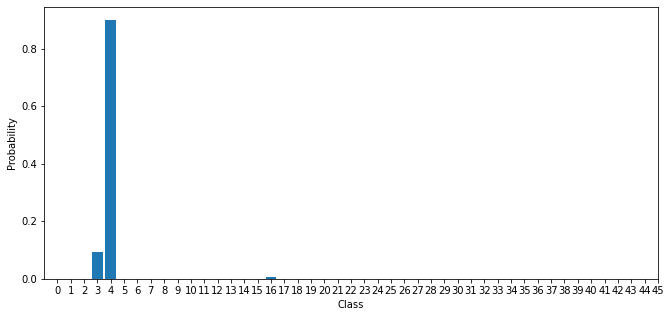

In [32]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [33]:
model.predict(tfidfv_test[3])

array([4])

### ****4-6. F1-Score, Confusion Matrix****

****필요한 라이브러리 불러오기****

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


****Precision, Recall & F1 Score****

[분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도) (tistory.com)](https://sumniya.tistory.com/26)

In [35]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

****Confusion Matrix****

[Confusion Matrix 혼동 행렬 :: Deeppp (tistory.com)](https://mjdeeplearning.tistory.com/31)

=3


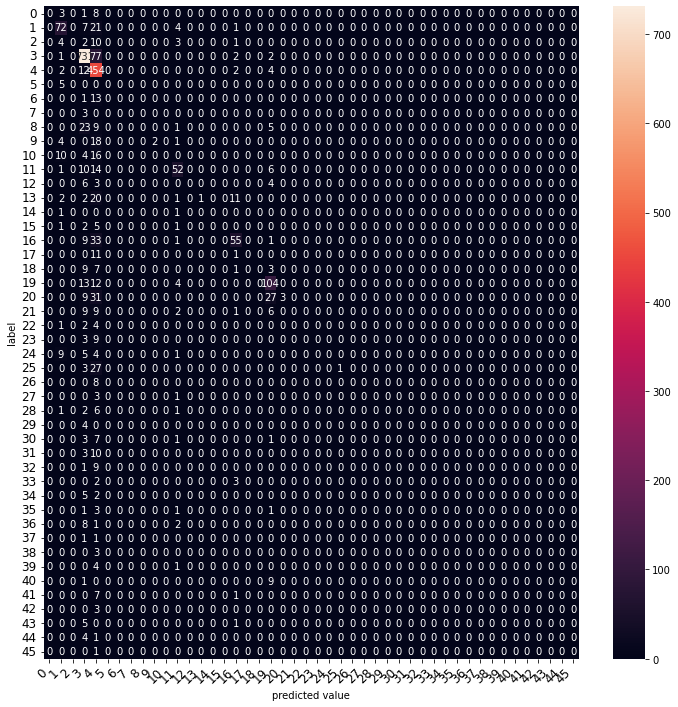

In [36]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

graph_confusion_matrix(model, tfidfv_test, y_test)

### ****4-7. 다양한 머신러닝 모델 사용해보기 (1)****

나이브 베이즈 분류기(MultinomialNB)로는 약 66%의 정확도를 얻음

****Complement Naive Bayes Classifier(CNB)****

컴플리먼트 나이브 베이즈 분류기 - 데이터의 불균형을 고려하여 가중치를 부여

In [37]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [38]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


****로지스틱 회귀(Logistic Regression)****

다중 클래스 분류를 위한 로지스틱 회귀

In [39]:
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [40]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
#정확도: 0.8076580587711487

정확도: 0.7951914514692787


****선형 서포트 벡터 머신(Linear Support Vector Machine)****

[서포트 벡터 머신 - 위키백과, 우리 모두의 백과사전 (wikipedia.org)](https://ko.wikipedia.org/wiki/%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0#:~:text=%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0(support%20vector,%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%9C%84%ED%95%B4%20%EC%82%AC%EC%9A%A9%ED%95%9C%EB%8B%A4.)

[지원 벡터 기계 - 위키백과, 우리 모두의 백과사전 (wikipedia.org)](https://en.wikipedia.org/wiki/Support-vector_machine#Definition)

In [41]:
lsvc = LinearSVC(C=1, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, dual=False, max_iter=500, penalty='l1')

In [42]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.838379341050757


### ****4-8. 다양한 머신러닝 모델 사용해보기 (2)****

**결정 트리(Decision Tree)**

[Decision tree - Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

[결정 트리 학습법 - 위키백과, 우리 모두의 백과사전 (wikipedia.org)](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)

사이킷런에서는 `DecisionTreeClassifier()`를 사용

In [43]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
#DecisionTreeClassifier(max_depth=10, random_state=0)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [44]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
#정확도: 0.6202137132680321

정확도: 0.6202137132680321


트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않음

**앙상블(Ensemble) 모델**

여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

****랜덤 포레스트(Random Forest)****

In [45]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [46]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


****그래디언트 부스팅 트리(GradientBoostingClassifier)****

순차적으로 트리를 만듬

In [47]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


#### 보팅(Voting)

In [49]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [50]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
#정확도: 0.8116651825467498

정확도: 0.8116651825467498


# ****4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기****

**단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트**

****라이브러리 버전을 확인해 봅니다****

In [51]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.22.2
1.3.3
1.0


In [52]:
import matplotlib.pyplot as plt

In [53]:
def decoded_data(encoded_data):
    decoded = []
    for i in range(len(encoded_data)):
        t = ' '.join([index_to_word[index] for index in encoded_data[i]])
        decoded.append(t)
    return decoded    

In [54]:
def model_accuracy(model, tfidfv_test, y_test):
    predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
    return accuracy_score(y_test, predicted)

### 나이브 베이즈 분류기

In [55]:
def Naive_Bayes(tfidfv, y_train):
    model_Naive_Bayes = MultinomialNB()
    model_Naive_Bayes.fit(tfidfv, y_train)
    return model_Naive_Bayes

### Complement Naive Bayes Classifier(CNB)

In [56]:
def Complement_Naive_Bayes(tfidfv, y_train):
    model_Complement_Naive_Bayes = ComplementNB()
    model_Complement_Naive_Bayes.fit(tfidfv, y_train)
    return model_Complement_Naive_Bayes

### 로지스틱 회귀(Logistic Regression)

In [57]:
def Logistic(tfidfv, y_train):
    model_Logistic = LogisticRegression(C=1, penalty='l2')
    model_Logistic.fit(tfidfv, y_train)
    return model_Logistic

### 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [58]:
def LinearSVC(tfidfv, y_train):
    model_LinearSVC = LinearSVC(C=1, penalty='l1', max_iter=500, dual=False)
    model_LinearSVC.fit(tfidfv, y_train)
    return model_LinearSVC

### 결정 트리(Decision Tree)

In [59]:
def tree(tfidfv, y_train):
    model_tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    model_tree.fit(tfidfv, y_train)
    return model_tree

## 앙상블(Ensemble) 모델

### 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [60]:
def GradientBoost(tfidfv, y_train):
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)
    return grbt

### 보팅(Voting)

In [61]:
def voting(tfidfv, y_train):
    voting_classifier = VotingClassifier(estimators=[
             ('lr',   LogisticRegression(C=1, penalty='l2')),
             ('cb',   ComplementNB()),
             ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    return voting_classifier

## 1. 모든 단어 사용

In [62]:
# model_list = [Naive_Bayes, Complement_Naive_Bayes, Logistic,  LinearSVC,  tree, GradientBoost,  voting]
model_list = [Naive_Bayes, Complement_Naive_Bayes, Logistic,  tree, GradientBoost,  voting]
# model_list = [Naive_Bayes, Complement_Naive_Bayes]

num_words_list = [25, 50, 100, 200, 500, 1000, 2000, 5000, 10000, None]
# num_words_list = [5000, 8000, None]

m = len(num_words_list)
n = len(model_list)

accuracy = [[0]*n for _ in range(m)]

for i in range(m):
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words_list[i], test_split=0.2)
    
    x_train = decoded_data(x_train)
    x_test  = decoded_data(x_test)
    
    # Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬을 이용해 벡터화
    # 사이킷런의 CountVectorizer()를 사용해서 Document Term Matrix, DTM 생성
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)

    
    # `TfidfTransformer()`를 사용해서 TF-IDF Matrix 생성
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
    
    for j, make_model in enumerate(model_list): # accuracy 구하기
        accuracy[i][j] = model_accuracy(make_model(tfidfv, y_train), tfidfv_test, y_test)        

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [63]:
accuracy

[[0.44256455921638466,
  0.47684772929652713,
  0.4866429207479964,
  0.5089047195013358,
  0.5146927871772039,
  0.5360641139804097],
 [0.4982190560997329,
  0.4946571682991986,
  0.5342831700801425,
  0.5569902048085486,
  0.5805877114870882,
  0.5828138913624221],
 [0.4977738201246661,
  0.5734639358860196,
  0.6344612644701692,
  0.6157613535173642,
  0.6393588601959038,
  0.6540516473731077],
 [0.5489759572573464,
  0.6264470169189671,
  0.6798753339269813,
  0.6046304541406946,
  0.6754229741763135,
  0.6812110418521816],
 [0.6589492430988424,
  0.707479964381122,
  0.7586821015138023,
  0.6108637577916296,
  0.7279608192341941,
  0.7479964381121995],
 [0.6856634016028496,
  0.7346393588601959,
  0.780053428317008,
  0.6179875333926982,
  0.7453250222617988,
  0.7693677649154052],
 [0.6914514692787177,
  0.7569011576135352,
  0.7974176313446126,
  0.6255565449688335,
  0.757346393588602,
  0.7836153161175423],
 [0.6731967943009796,
  0.7707034728406055,
  0.7978628673196795,
  0.

Text(0, 0.5, 'Accuracy')

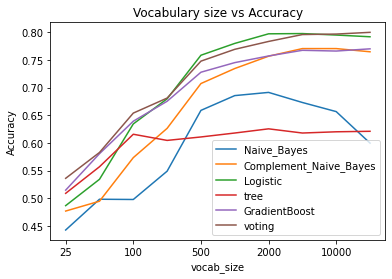

In [64]:
column_names = ['Naive_Bayes', 'Complement_Naive_Bayes', 'Logistic',  'tree', 'GradientBoost',  'voting']
# row_indices  = ['3000', '5000', '8000', '10000', 'None']
row_indices  = ['25', '50', '100', '200', '500', '1000', '2000', '5000', '10000', 'None']
data_df = pd.DataFrame(accuracy, index=row_indices, columns=column_names)
%matplotlib inline 
data_df.plot( )
plt.title('Vocabulary size vs Accuracy')
plt.xlabel("vocab_size")
plt.ylabel('Accuracy')

## 2. 빈도수 상위 5,000개의 단어만 사용

## 3. 직접 단어 개수를 설정해서 사용

위 단계에서 5000으로 제시된 `num_words`를 다양하게 바꾸어 가며 성능을 확인. 최소 3가지 경우 이상을 실험

**사용할 모델**

나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

## 4. 딥러닝 모델과 비교해 보기

위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

## LSTM 사용 네이버 영화감상평 분류 코드 사용

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
def plot_graphs(history, metric):
    '''
    히스토리 그래프
    '''
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])

### 데이터 불러오기

In [3]:
# 문장 토큰수 제한
min_len = 20   # 최소 길이
# max_len = 21 나중에 정함

vocab_size      = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300      # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)
# word_vector_dim = 100      # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)
BUFFER_SIZE     = 1024
# BATCH_SIZE      = 512
BATCH_SIZE      = 64
epochs          = 60

# 약 8982건의 train 데이터
# validation set 사이즈 8982 * 0.2 = 약1792

int_partition = int((8982 * 0.2) / BATCH_SIZE) * BATCH_SIZE

print(int_partition)

1792


In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최소 : ', np.min(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + np.std(num_tokens)
max_len = int(max_tokens)

print('pad_sequences max_len : ', max_len)
print('전체 문장의 {}%가 max_len 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))


문장길이 평균 :  145.96419665122906
문장길이 최소 :  2
문장길이 최대 :  2376
문장길이 표준편차 :  145.8784764459447
pad_sequences max_len :  291
전체 문장의 0.8810117563234771%가 max_len 설정값 이내에 포함됩니다. 


In [6]:
num_classes = max(y_train) + 1

In [7]:
x_train_st = []
y_train_st = []
for tokens, label in zip(x_train, y_train) :
    if min_len <= len(tokens) and  len(tokens) <= max_len:  # 토큰의 길이가 min_len max_len 사이에 있게 한다.
        x_train_st.append(tokens)
        y_train_st.append(label)
y_train = np.array(y_train_st)

x_test_st = []
y_test_st = []
for tokens, label in zip(x_test, y_test) :   
    if min_len <= len(tokens) and  len(tokens) <= max_len:  # 토큰의 길이가 min_len max_len 사이에 있게 한다.
        x_test_st.append(tokens)
        y_test_st.append(label)
y_test = np.array(y_test_st)

In [8]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_st, padding='post', maxlen=max_len)
x_test  = tf.keras.preprocessing.sequence.pad_sequences(x_test_st,  padding='post', maxlen=max_len)
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)

(7603, 291)
(7603, 46)


In [9]:
# for i in range(5):
#   print(x_train[i])
#   print(y_train[i])

In [10]:
x_val = x_train[:int_partition]   
y_val = y_train[:int_partition]

# validation set을 제외한 나머지 
partial_x_train = x_train[int_partition:]  
partial_y_train = y_train[int_partition:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(5811, 291)
(5811, 46)


In [11]:
x_val = x_train[:int_partition]   
y_val = y_train[:int_partition]

# validation set을 제외한 나머지 
partial_x_train = x_train[int_partition:]  
partial_y_train = y_train[int_partition:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(5811, 291)
(5811, 46)


In [12]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 input_length=max_len, 
                                 trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 291, 300)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 291, 512)         1140736   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                1

In [13]:
print([layer.supports_masking for layer in model_LSTM.layers])

[False, True, True, True, True, True]


In [14]:
model_LSTM.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history_LSTM = model_LSTM.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, mc],
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/60
91/91 [==============================] - ETA: 0s - loss: 2.5928 - acc: 0.4345
Epoch 1: val_acc improved from -inf to 0.53292, saving model to best_model.h5
91/91 [==============================] - 38s 340ms/step - loss: 2.5928 - acc: 0.4345 - val_loss: 2.0927 - val_acc: 0.5329
Epoch 2/60
91/91 [==============================] - ETA: 0s - loss: 1.9273 - acc: 0.5548
Epoch 2: val_acc improved from 0.53292 to 0.54074, saving model to best_model.h5
91/91 [==============================] - 30s 328ms/step - loss: 1.9273 - acc: 0.5548 - val_loss: 1.9027 - val_acc: 0.5407
Epoch 3/60
91/91 [==============================] - ETA: 0s - loss: 1.6421 - acc: 0.6056
Epoch 3: val_acc improved from 0.54074 to 0.59766, saving model to best_model.h5
91/91 [==============================] - 30s 335ms/step - loss: 1.6421 - acc: 0.6056 - val_loss: 1.6309 - val_acc: 0.5977
Epoch 4/60
91/91 [==============================] - ETA: 0s - loss: 1.4702 - acc: 0.6376
Epoch 4: val_acc improved from 0.59766

In [16]:
loaded_model = load_model('best_model.h5')
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

59/59 [==============================] - 6s 65ms/step - loss: 1.5030 - acc: 0.6859
Test Loss: 1.5030375719070435
Test Accuracy: 0.6859109997749329


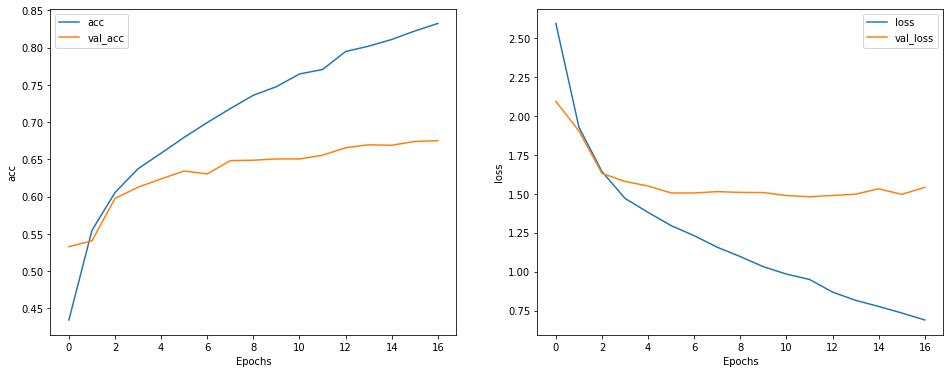

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM, 'acc')
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM, 'loss')

## 후기  

### Vocabulary Size를 변경해서 시도해보기  
#### Out [64] 참고  

#### DecisionTreeClassifier와 Naive Bayes 분류기 를 제외하고 0.75 이상의 정확도를 보였다.  

#### Naive Bayes는 단어수 2000 정도에서 최고점 0.67 정도가 나왔고 단어수가 늘수록 성능이 저하되었다.  

#### DecisionTreeClassifier는 단어수 100에서 0.62 정도 나왔고 단어수가 늘더라도 더이상 성능향상이 없었다.  
  
  
### 딥러닝 모델과 비교해 보기

#### 딥러닝 모델의 Test Loss: 1.50  Test Accuracy: 0.686 으로 머신러닝 모델들의 성능이 단순한 딥러닝보다 높게 나왔다.

  
  

## 아이펠은 실습환경을 제대로 제공하라.

![](https://raw.githubusercontent.com/Kona-cfd/AIFFEL_PROJECT/main/%EC%95%84%EC%9D%B4%ED%8E%A0%EC%8B%A4%EC%83%81.JPG)

